<a href="https://colab.research.google.com/github/LorraineMaira/Lorraine/blob/main/LABIA_P01_LorraineNeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Nome: Lorraine Maíra
# Matrícula: 20203014947
# Objetivo: Implementar, testar e documentar um controlador Mamdani com 2 entradas e 1 saída usando scikit-fuzzy.
# Fonte: CEFET-MG - Prof. Everthon de Souza Oliveira

%pip install scikit-fuzzy numpy matplotlib

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Configuração para melhor visualização dos plots
plt.rcParams['figure.figsize'] = (10, 6)


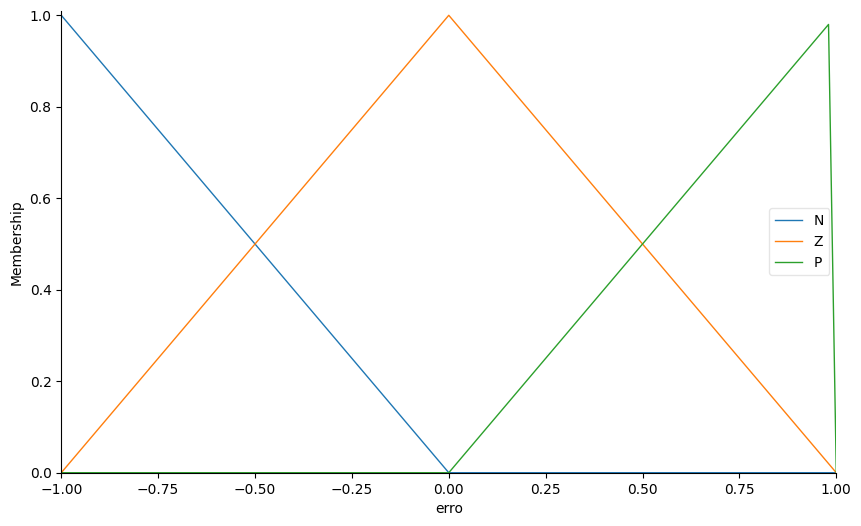

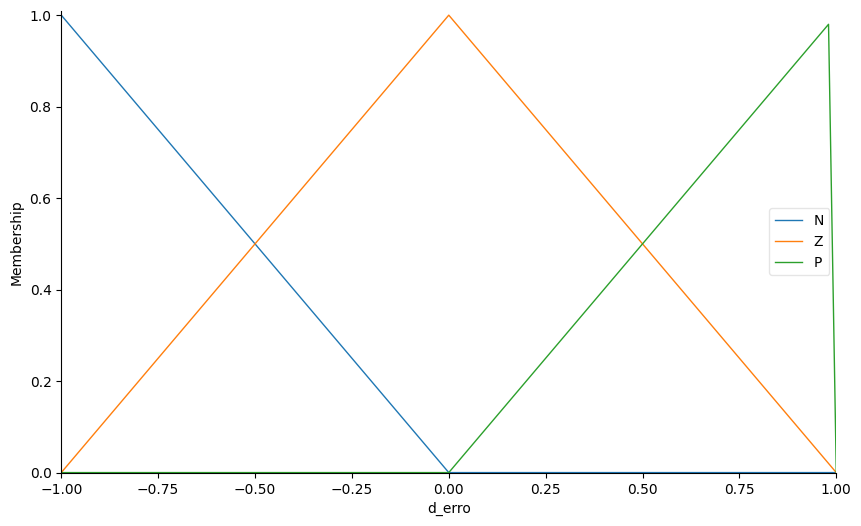

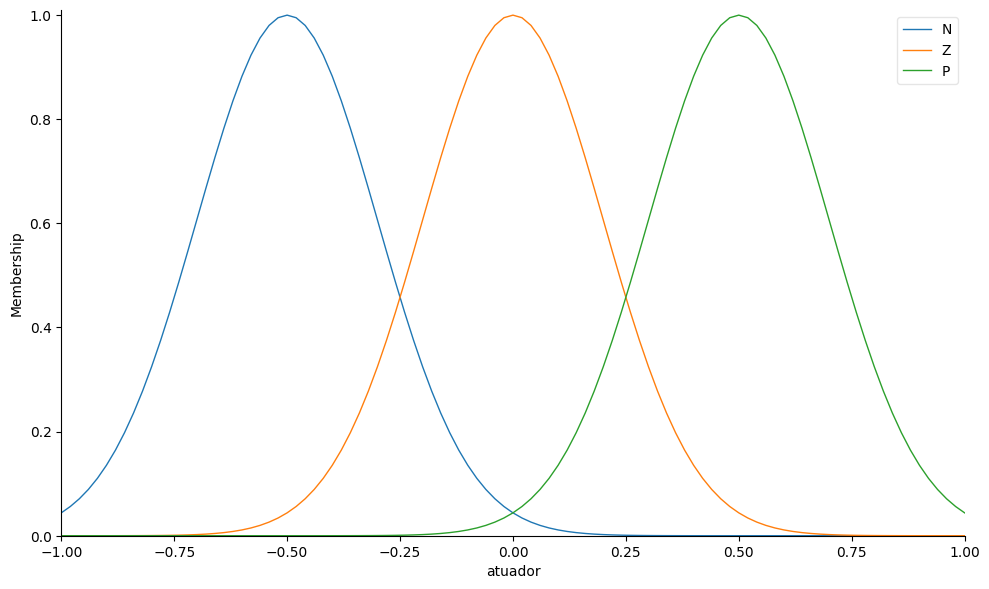

In [26]:
# Definição dos universos de discurso em [-1, 1] com 101 pontos
erro = ctrl.Antecedent(np.arange(-1, 1.01, 0.02), 'erro')
d_erro = ctrl.Antecedent(np.arange(-1, 1.01, 0.02), 'd_erro')
atuador = ctrl.Consequent(np.arange(-1, 1.01, 0.02), 'atuador')

# Funções de pertinência triangulares para as entradas
erro['N'] = fuzz.trimf(erro.universe, [-1, -1, 0])
erro['Z'] = fuzz.trimf(erro.universe, [-1, 0, 1])
erro['P'] = fuzz.trimf(erro.universe, [0, 1, 1])

d_erro['N'] = fuzz.trimf(d_erro.universe, [-1, -1, 0])
d_erro['Z'] = fuzz.trimf(d_erro.universe, [-1, 0, 1])
d_erro['P'] = fuzz.trimf(d_erro.universe, [0, 1, 1])

# Funções de pertinência gaussianas para a saída
atuador['N'] = fuzz.gaussmf(atuador.universe, -0.5, 0.2)
atuador['Z'] = fuzz.gaussmf(atuador.universe, 0, 0.2)
atuador['P'] = fuzz.gaussmf(atuador.universe, 0.5, 0.2)

# Gráficos das MFs
erro.view()
d_erro.view()
atuador.view()
plt.tight_layout()

In [27]:
# Definição das regras fuzzy
regra1 = ctrl.Rule(erro['N'] & d_erro['N'], atuador['P'])
regra2 = ctrl.Rule(erro['N'] & d_erro['Z'], atuador['P'])
regra3 = ctrl.Rule(erro['N'] & d_erro['P'], atuador['Z'])
regra4 = ctrl.Rule(erro['Z'] & d_erro['N'], atuador['P'])
regra5 = ctrl.Rule(erro['Z'] & d_erro['Z'], atuador['Z'])
regra6 = ctrl.Rule(erro['Z'] & d_erro['P'], atuador['N'])
regra7 = ctrl.Rule(erro['P'] & d_erro['N'], atuador['Z'])
regra8 = ctrl.Rule(erro['P'] & d_erro['Z'], atuador['N'])
regra9 = ctrl.Rule(erro['P'] & d_erro['P'], atuador['N'])

# Justificativa das regras:
# As regras foram definidas para corrigir o erro. Se o erro for negativo e estiver diminuindo (d_erro negativo), o atuador deve ser positivo para levá-lo de volta ao zero. Se o erro for positivo e aumentando, o atuador deve ser negativo para compensar. Se o erro estiver perto de zero, o atuador deve permanecer zero.

# Criação do sistema de controle
sistema_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
simulador_ctrl = ctrl.ControlSystemSimulation(sistema_ctrl)

In [28]:
# Avaliação de 3 testes pontuais
testes = [(-0.6, 0.1), (0.7, -0.2), (0.0, 0.0)]
resultados = []

for e, de in testes:
    simulador_ctrl.input['erro'] = e
    simulador_ctrl.input['d_erro'] = de
    simulador_ctrl.compute()
    resultados.append((e, de, simulador_ctrl.output['atuador']))

# Exibição dos resultados em forma de tabela
print("Tabela de Testes Pontuais:")
print("-" * 35)
print(f"{'Erro':<10} {'d_erro':<10} {'Atuador':<10}")
print("-" * 35)
for res in resultados:
    print(f"{res[0]:<10.2f} {res[1]:<10.2f} {res[2]:<10.4f}")
print("-" * 35)

# Comentário sobre os resultados
# Os resultados fazem sentido. Por exemplo, para erro = -0.6 e d_erro = 0.1, o atuador é positivo, o que é esperado para corrigir um erro negativo. Para erro = 0.7 e d_erro = -0.2, o atuador é negativo, o que compensa o erro positivo.

Tabela de Testes Pontuais:
-----------------------------------
Erro       d_erro     Atuador   
-----------------------------------
-0.60      0.10       0.2106    
0.70       -0.20      -0.1822   
0.00       0.00       0.0000    
-----------------------------------


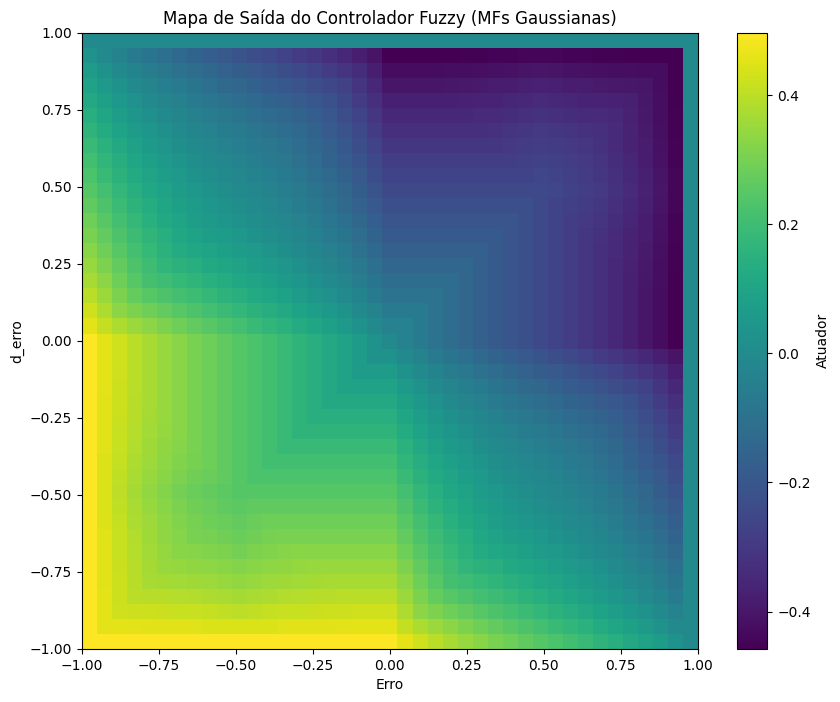

In [29]:
# Geração da grade 41x41
erros_grid = np.arange(-1, 1.01, 0.05)
derros_grid = np.arange(-1, 1.01, 0.05)
atuador_saida = np.zeros((len(erros_grid), len(derros_grid)))

# Redefinição das variáveis e regras para garantir o escopo correto na geração do heatmap
# Definição dos universos de discurso
erro_heatmap = ctrl.Antecedent(np.arange(-1, 1.01, 0.02), 'erro')
d_erro_heatmap = ctrl.Antecedent(np.arange(-1, 1.01, 0.02), 'd_erro')
atuador_heatmap = ctrl.Consequent(np.arange(-1, 1.01, 0.02), 'atuador')

# Funções de pertinência triangulares para as entradas (reutilizando as definidas anteriormente)
erro_heatmap['N'] = fuzz.trimf(erro_heatmap.universe, [-1, -1, 0])
erro_heatmap['Z'] = fuzz.trimf(erro_heatmap.universe, [-1, 0, 1])
erro_heatmap['P'] = fuzz.trimf(erro_heatmap.universe, [0, 1, 1])

d_erro_heatmap['N'] = fuzz.trimf(d_erro_heatmap.universe, [-1, -1, 0])
d_erro_heatmap['Z'] = fuzz.trimf(d_erro_heatmap.universe, [-1, 0, 1])
d_erro_heatmap['P'] = fuzz.trimf(d_erro_heatmap.universe, [0, 1, 1])

# Funções de pertinência gaussianas para a saída (reutilizando as definidas anteriormente)
atuador_heatmap['N'] = fuzz.gaussmf(atuador_heatmap.universe, -0.5, 0.2)
atuador_heatmap['Z'] = fuzz.gaussmf(atuador_heatmap.universe, 0, 0.2)
atuador_heatmap['P'] = fuzz.gaussmf(atuador_heatmap.universe, 0.5, 0.2)

# Definição das regras fuzzy (reutilizando a lógica anterior)
regra1_heatmap = ctrl.Rule(erro_heatmap['N'] & d_erro_heatmap['N'], atuador_heatmap['P'])
regra2_heatmap = ctrl.Rule(erro_heatmap['N'] & d_erro_heatmap['Z'], atuador_heatmap['P'])
regra3_heatmap = ctrl.Rule(erro_heatmap['N'] & d_erro_heatmap['P'], atuador_heatmap['Z'])
regra4_heatmap = ctrl.Rule(erro_heatmap['Z'] & d_erro_heatmap['N'], atuador_heatmap['P'])
regra5_heatmap = ctrl.Rule(erro_heatmap['Z'] & d_erro_heatmap['Z'], atuador_heatmap['Z'])
regra6_heatmap = ctrl.Rule(erro_heatmap['Z'] & d_erro_heatmap['P'], atuador_heatmap['N'])
regra7_heatmap = ctrl.Rule(erro_heatmap['P'] & d_erro_heatmap['N'], atuador_heatmap['Z'])
regra8_heatmap = ctrl.Rule(erro_heatmap['P'] & d_erro_heatmap['Z'], atuador_heatmap['N'])
regra9_heatmap = ctrl.Rule(erro_heatmap['P'] & d_erro_heatmap['P'], atuador_heatmap['N'])


# Criação do sistema de controle para o heatmap
sistema_ctrl_heatmap = ctrl.ControlSystem([regra1_heatmap, regra2_heatmap, regra3_heatmap, regra4_heatmap, regra5_heatmap, regra6_heatmap, regra7_heatmap, regra8_heatmap, regra9_heatmap])
simulador_ctrl_heatmap = ctrl.ControlSystemSimulation(sistema_ctrl_heatmap)


for i, e in enumerate(erros_grid):
    for j, de in enumerate(derros_grid):
        simulador_ctrl_heatmap.input['erro'] = e
        simulador_ctrl_heatmap.input['d_erro'] = de
        simulador_ctrl_heatmap.compute()
        # Check if 'atuador' key exists before accessing it
        if 'atuador' in simulador_ctrl_heatmap.output:
            atuador_saida[i, j] = simulador_ctrl_heatmap.output['atuador']
        else:
            # If 'atuador' is not in output, it means no rules fired, so output is effectively 0
            atuador_saida[i, j] = 0.0


# Plotagem do heatmap
plt.figure(figsize=(10, 8))
plt.imshow(atuador_saida, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Atuador')
plt.title('Mapa de Saída do Controlador Fuzzy (MFs Gaussianas)')
plt.xlabel('Erro')
plt.ylabel('d_erro')
plt.grid(False)
plt.show()

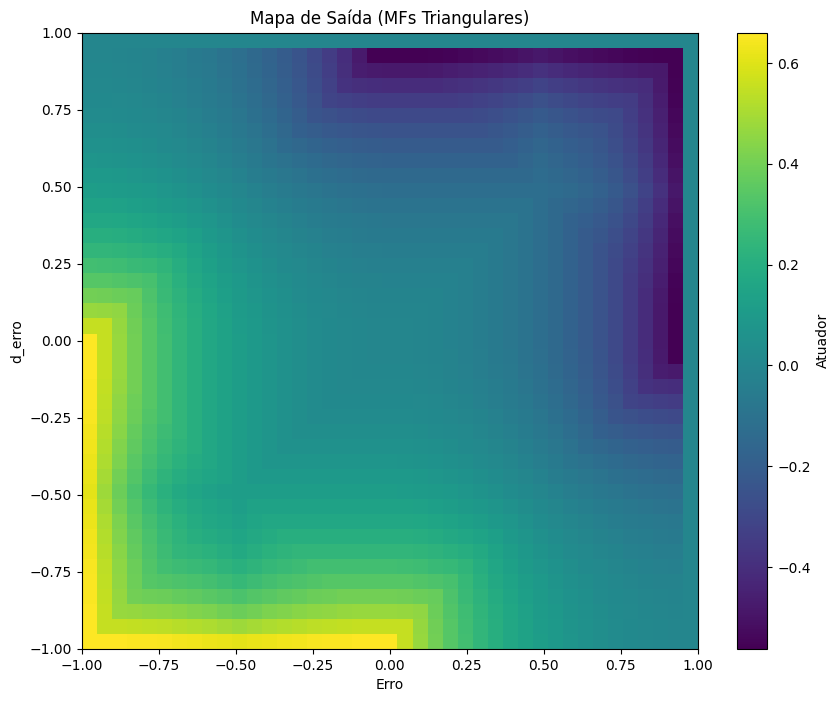

In [30]:
# Variação: MFs de saída triangulares
atuador_triangular = ctrl.Consequent(np.arange(-1, 1.01, 0.02), 'atuador_triangular')
atuador_triangular['N'] = fuzz.trimf(atuador_triangular.universe, [-1, -1, 0])
atuador_triangular['Z'] = fuzz.trimf(atuador_triangular.universe, [-1, 0, 1])
atuador_triangular['P'] = fuzz.trimf(atuador_triangular.universe, [0, 1, 1])

# Novas regras e sistema com MFs triangulares
# Reuse the antecedent variables 'erro' and 'd_erro' defined earlier if they are still available and appropriate.
# If not, they should be redefined here. Based on the notebook state, they are defined in dGTRHso4QXI_.
# Assuming 'erro' and 'd_erro' are accessible from the previous cells.
nova_regra1 = ctrl.Rule(erro['N'] & d_erro['N'], atuador_triangular['P'])
nova_regra2 = ctrl.Rule(erro['N'] & d_erro['Z'], atuador_triangular['P'])
nova_regra3 = ctrl.Rule(erro['N'] & d_erro['P'], atuador_triangular['Z'])
nova_regra4 = ctrl.Rule(erro['Z'] & d_erro['N'], atuador_triangular['P'])
nova_regra5 = ctrl.Rule(erro['Z'] & d_erro['Z'], atuador_triangular['Z'])
nova_regra6 = ctrl.Rule(erro['Z'] & d_erro['P'], atuador_triangular['N'])
nova_regra7 = ctrl.Rule(erro['P'] & d_erro['N'], atuador_triangular['Z'])
nova_regra8 = ctrl.Rule(erro['P'] & d_erro['Z'], atuador_triangular['N'])
nova_regra9 = ctrl.Rule(erro['P'] & d_erro['P'], atuador_triangular['N'])

novo_sistema_ctrl = ctrl.ControlSystem([nova_regra1, nova_regra2, nova_regra3, nova_regra4, nova_regra5, nova_regra6, nova_regra7, nova_regra8, nova_regra9])
novo_simulador_ctrl = ctrl.ControlSystemSimulation(novo_sistema_ctrl)

# Geração e plotagem do novo heatmap
atuador_saida_tri = np.zeros((len(erros_grid), len(derros_grid)))
for i, e in enumerate(erros_grid):
    for j, de in enumerate(derros_grid):
        novo_simulador_ctrl.input['erro'] = e
        novo_simulador_ctrl.input['d_erro'] = de
        novo_simulador_ctrl.compute()
        # Check if 'atuador_triangular' key exists before accessing it
        if 'atuador_triangular' in novo_simulador_ctrl.output:
            atuador_saida_tri[i, j] = novo_simulador_ctrl.output['atuador_triangular']
        else:
            # If 'atuador_triangular' is not in output, it means no rules fired, so output is effectively 0
            atuador_saida_tri[i, j] = 0.0


plt.figure(figsize=(10, 8))
plt.imshow(atuador_saida_tri, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Atuador')
plt.title('Mapa de Saída (MFs Triangulares)')
plt.xlabel('Erro')
plt.ylabel('d_erro')
plt.grid(False)
plt.show()

# Comparação e análise da variação
# O novo heatmap apresenta transições mais bruscas entre as zonas de controle (cores). Isso ocorre porque as MFs triangulares têm picos mais definidos e caem abruptamente, resultando em um comportamento de defuzzificação que não é tão suave quanto o das MFs gaussianas. As MFs gaussianas, com suas curvas suaves, criam uma superfície de controle mais contínua e "arredondada", o que geralmente resulta em um controle mais suave no sistema real.

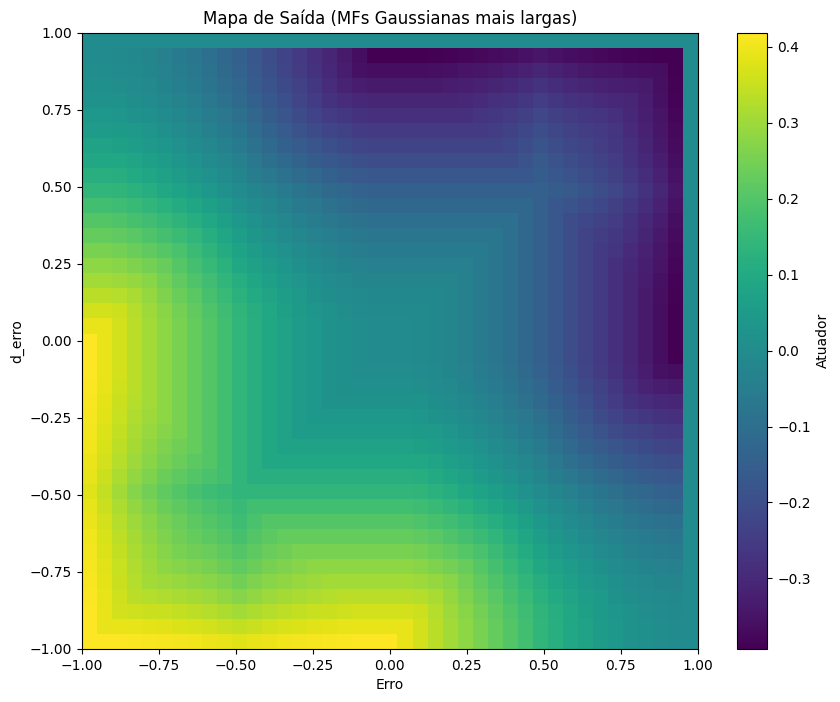

In [31]:
# Pequena exploração: Modificação da largura das MFs
# Exemplo: Aumentar a largura das MFs gaussianas do atuador
atuador_exploracao = ctrl.Consequent(np.arange(-1, 1.01, 0.02), 'atuador_exploracao')
atuador_exploracao['N'] = fuzz.gaussmf(atuador_exploracao.universe, -0.5, 0.4) # Aumento do desvio padrão
atuador_exploracao['Z'] = fuzz.gaussmf(atuador_exploracao.universe, 0, 0.4)
atuador_exploracao['P'] = fuzz.gaussmf(atuador_exploracao.universe, 0.5, 0.4)

# Novas regras e sistema com MFs mais largas
regras_exp = [
    ctrl.Rule(erro['N'] & d_erro['N'], atuador_exploracao['P']),
    ctrl.Rule(erro['N'] & d_erro['Z'], atuador_exploracao['P']),
    ctrl.Rule(erro['N'] & d_erro['P'], atuador_exploracao['Z']),
    ctrl.Rule(erro['Z'] & d_erro['N'], atuador_exploracao['P']),
    ctrl.Rule(erro['Z'] & d_erro['Z'], atuador_exploracao['Z']),
    ctrl.Rule(erro['Z'] & d_erro['P'], atuador_exploracao['N']),
    ctrl.Rule(erro['P'] & d_erro['N'], atuador_exploracao['Z']),
    ctrl.Rule(erro['P'] & d_erro['Z'], atuador_exploracao['N']),
    ctrl.Rule(erro['P'] & d_erro['P'], atuador_exploracao['N'])
]

sistema_exp = ctrl.ControlSystem(regras_exp)
simulador_exp = ctrl.ControlSystemSimulation(sistema_exp)

# Geração e plotagem do heatmap
atuador_saida_exp = np.zeros((len(erros_grid), len(derros_grid)))
for i, e in enumerate(erros_grid):
    for j, de in enumerate(derros_grid):
        simulador_exp.input['erro'] = e
        simulador_exp.input['d_erro'] = de
        simulador_exp.compute()
        # Check if 'atuador_exploracao' key exists before accessing it
        if 'atuador_exploracao' in simulador_exp.output:
            atuador_saida_exp[i, j] = simulador_exp.output['atuador_exploracao']
        else:
            # If 'atuador_exploracao' is not in output, it means no rules fired, so output is effectively 0
            atuador_saida_exp[i, j] = 0.0


plt.figure(figsize=(10, 8))
plt.imshow(atuador_saida_exp, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Atuador')
plt.title('Mapa de Saída (MFs Gaussianas mais largas)')
plt.xlabel('Erro')
plt.ylabel('d_erro')
plt.grid(False)
plt.show()

# Aumento da largura das MFs de saída. Isso resulta em uma superfície de controle mais suave e com menor variação, pois a área de sobreposição das MFs aumentou.